In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape, Y.shape)

(70000, 784) (70000,)


In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [ ]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
70000 non-null  category
dtypes: category(1)
memory usage: 68.9 KB


In [ ]:
# for col in X.columns:
#     Q1 = X[col].quantile(0.20)
#     Q3 = X[col].quantile(0.80)

#     IQR = Q3 - Q1
#     mask = ((X[col] >= (Q1 - 1.5 * IQR)) & (X[col] <= (Q3 + 1.5 * IQR)))

#     X = X[mask]
#     Y = Y[mask]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, QuantileTransformer

# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
# qt = QuantileTransformer(output_distribution='normal', random_state=42)
# X = pd.DataFrame(qt.fit_transform(X))

# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def randomForest(X, Y, test_size):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    RandomForestModel = RandomForestClassifier()
    RandomForestModel.fit(X_train, Y_train)
    y_pred = RandomForestModel.predict(X_test)
    print("Accuracy score ", accuracy_score(Y_test, y_pred))
    print("Precision score is ", precision_score(Y_test, y_pred, average='macro'))
    print("Recall score is ", recall_score(Y_test, y_pred, average='macro'))
    print("F1 score is ", f1_score(Y_test, y_pred, average='macro'))
    cm = confusion_matrix(Y_test, y_pred)
    print("Confusion matrix is ", cm)

    print("The heatmap is ")
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # print("Validated accuracy score is ", cross_val_score(RandomForestClassifier(), X, Y, scoring = 'accuracy', cv=10).mean())

## Part 1 - 80:20 Ratio

Accuracy score  0.9668571428571429
Precision score is  0.9666949472272144
Recall score is  0.9666491289586533
F1 score is  0.96663906177765
Confusion matrix is  [[1323    0    3    0    2    1    2    1   10    1]
 [   0 1579    6    7    2    0    0    2    2    2]
 [   5    3 1340    3    4    2    8    6    8    1]
 [   1    0   27 1353    0   11    1   18   14    8]
 [   3    0    2    1 1251    0    5    3    2   28]
 [   4    2    4   17    2 1222   10    0    9    3]
 [   5    1    0    0    5   10 1374    0    1    0]
 [   3    5   20    0    6    0    0 1449    3   17]
 [   0    6   11   15    6    6    5    4 1296    8]
 [   5    8    5   11   17    5    2   11    7 1349]]
The heatmap is 


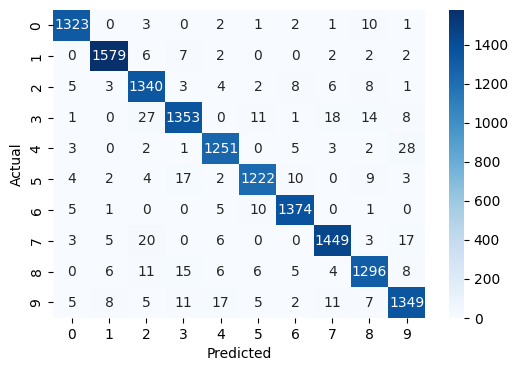

In [ ]:
randomForest(X, Y, 0.2)

In [ ]:
# The accuracy score for this 80:20 distribution is 96%

## Part 2 - 60:40 Ratio

Accuracy score  0.9659642857142857
Precision score is  0.9657346919429676
Recall score is  0.9656695864814442
F1 score is  0.9656759689713489
Confusion matrix is  [[2733    0    7    0    3    4    9    2   19    1]
 [   0 3113   14   13    4    3    1    6    4    1]
 [  12    5 2718   14   11    3   13   20    8    2]
 [   7    1   37 2687    3   28    3   20   28   15]
 [   5    5    6    0 2568    0    6    8    3   47]
 [  10    2    4   30    6 2447   20    3   13    9]
 [   9    2    1    1    9   13 2723    0    8    0]
 [   2   14   38    4   13    0    0 2872    5   37]
 [   5   15   18   25   14   21   18    5 2509   35]
 [  15    8    9   30   34    7    2   24   14 2677]]
The heatmap is 


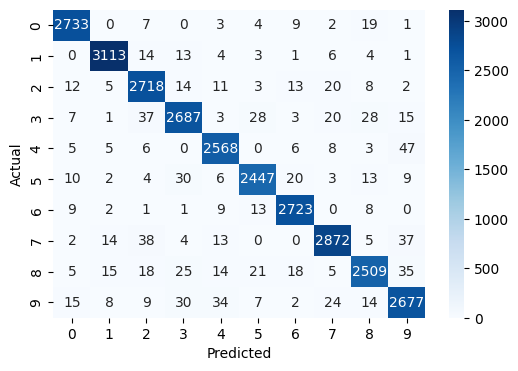

In [ ]:
randomForest(X, Y, 0.4)

In [ ]:
# The accuracy for this 60:40 ratio distribution is 96%

## Part 3 - 70:30 Ratio

Accuracy score  0.964952380952381
Precision score is  0.9648308446305256
Recall score is  0.9646799649951369
F1 score is  0.9647335897394538
Confusion matrix is  [[2030    0    6    0    1    2    5    1   12    1]
 [   0 2331   10   10    3    1    0    6    3    0]
 [   7    7 2065    7    4    1   12   14   13    3]
 [   3    0   34 2057    1   24    3   19   22   13]
 [   2    4    3    0 1874    0    6    6    3   38]
 [   6    5    2   30    3 1833   11    3   15    7]
 [   7    2    1    0   10   11 2051    0    6    0]
 [   2   10   32    1    9    1    0 2163    2   28]
 [   4   13   11   19   11   14   10    7 1887   16]
 [  14    9    8   26   22    3    2   20   13 1973]]
The heatmap is 


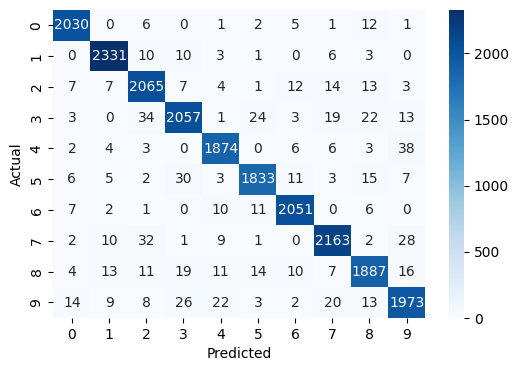

In [ ]:
randomForest(X, Y, 0.3)

In [ ]:
# The accuracy for this 70:30 ratio distribution of the dataset is 96%

## Part 4 - 50:50 Ratio

Accuracy score  0.9638571428571429
Precision score is  0.9635975188934823
Recall score is  0.963528766261532
F1 score is  0.9635287957121024
Confusion matrix is  [[3408    0    8    0    3    7   12    1   23    1]
 [   0 3863   20   13    6    3    6    8    6    2]
 [  16    7 3410   10   16    4   11   27   16    3]
 [   9    2   57 3346    3   42    4   26   40   22]
 [   7    6    6    1 3234    0   12    6    5   56]
 [  17    5    4   42    9 2992   29    5   30   11]
 [  15    5    1    1   10   20 3428    0   10    0]
 [   2   20   46    3   15    2    0 3563    7   60]
 [   6   16   24   32   18   25   23    8 3158   34]
 [  17   11   12   36   43    4    3   29   22 3333]]
The heatmap is 


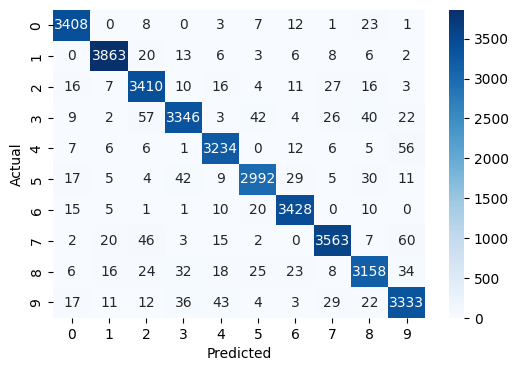

In [ ]:
randomForest(X, Y, 0.5)

In [ ]:
# The accuracy for this 50:50 ratio distribution of the dataset is 96%.

# SVM

In [ ]:
from sklearn.svm import SVC, LinearSVC

def svcClassifier(X, Y, test_size, kernel):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    if kernel == 'linear':
        svcModel = LinearSVC(max_iter = 10000, verbose = 1)
    else:
        svcModel = SVC(kernel=kernel, verbose = True)
    svcModel.fit(X_train, Y_train)
    y_pred = svcModel.predict(X_test)
    print("Accuracy score ", accuracy_score(Y_test, y_pred))
    print("Precision score is ", precision_score(Y_test, y_pred, average='macro'))
    print("Recall score is ", recall_score(Y_test, y_pred, average='macro'))
    print("F1 score is ", f1_score(Y_test, y_pred, average='macro'))
    cm = confusion_matrix(Y_test, y_pred)
    print("Confusion matrix is ", cm)

    print("The heatmap is ")
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # print("Validated accuracy score is ", cross_val_score(RandomForestClassifier(), X, Y, scoring = 'accuracy', cv=10).mean())

## Part 1 - 80:20

[LibLinear]Accuracy score  0.9135714285714286
Precision score is  0.9124688235057942
Recall score is  0.9122556918649247
F1 score is  0.9122076215481931
Confusion matrix is  [[1307    1    5    0    0    6   14    2    7    1]
 [   0 1560    5    8    2   10    2    3    9    1]
 [   9   19 1225   19   19   12   18   15   36    8]
 [   8   11   39 1268    1   37    8   15   25   21]
 [   4    3    9    5 1199    4    7    6   13   45]
 [  10   11    8   52   16 1103   19    7   36   11]
 [   7    4   17    1   11   19 1332    0    4    1]
 [   4    5   21    4   12    9    0 1411    3   34]
 [  14   40   19   43    7   50   13    9 1131   31]
 [   6    9    5   27   46   10    0   53   10 1254]]
The heatmap is 


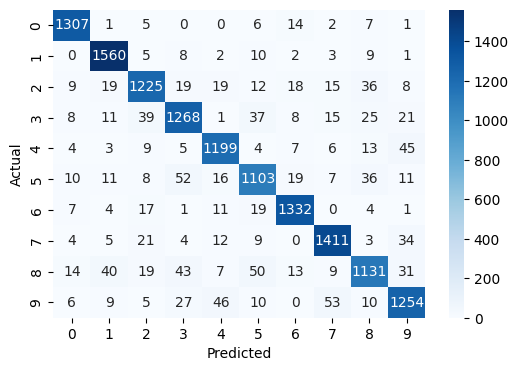

In [ ]:
# linear model of the SVC
svcClassifier(X, Y, 0.2, 'linear')

In [ ]:
# For the 80:20 ratio ditribution of the dataset, using SVC model with linear Kernel, the accuracy is 91.3 %

[LibSVM]Accuracy score  0.9739285714285715
Precision score is  0.9740037832827777
Recall score is  0.9737707809786281
F1 score is  0.9738427144215536
Confusion matrix is  [[1325    1    4    0    1    3    4    1    4    0]
 [   0 1588    2    3    1    0    1    2    1    2]
 [   2    9 1341    3    2    4    4    7    6    2]
 [   1    3   13 1375    3   13    0   10    9    6]
 [   2    2    4    0 1268    0    2    2    3   12]
 [   0    4    1   14    2 1243    4    0    4    1]
 [   1    0    0    0    7    8 1378    0    2    0]
 [   1   13    9    0    3    0    0 1466    1   10]
 [   3   11    7   13    5   12    3    4 1296    3]
 [   7   11    2   10   17    3    0   11    4 1355]]
The heatmap is 


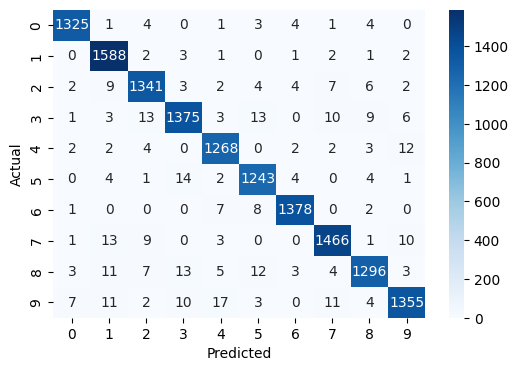

In [ ]:
svcClassifier(X, Y, 0.2, 'poly')

In [ ]:
# For the 80:20 ratio ditribution of the dataset, using SVC model with poly Kernel, the accuracy is 97.3 %

In [ ]:
# gaussian

[LibSVM]Accuracy score  0.9764285714285714
Precision score is  0.9763608291708306
Recall score is  0.9762666612492419
F1 score is  0.9762962373195112
Confusion matrix is  [[1329    1    3    0    1    2    2    1    4    0]
 [   0 1585    4    3    2    0    0    4    2    0]
 [   3    4 1348    2    3    2    4    8    5    1]
 [   0    2   11 1386    2   11    1    9    7    4]
 [   1    0    2    0 1269    0    3    2    2   16]
 [   0    1    2   15    2 1236    9    1    7    0]
 [   1    0    0    0    4    4 1384    0    3    0]
 [   1    6   12    1    5    1    0 1465    1   11]
 [   2    6    8   12    4    9    6    4 1303    3]
 [   5    8    2    8   14    2    0   11    5 1365]]
The heatmap is 


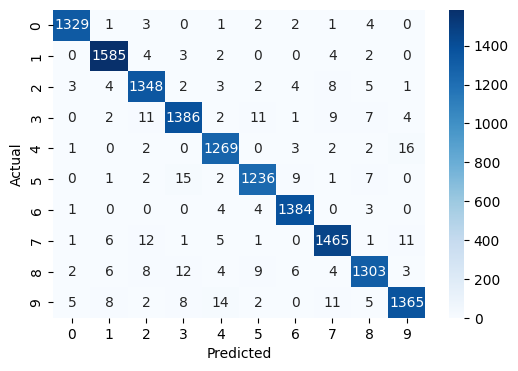

In [ ]:
svcClassifier(X, Y, 0.2, 'rbf')

In [ ]:
# For the 80:20 ratio distribution of the dataset with the SVC model with Gaussian kernel, the accuracy is 97.6%

In [ ]:
# sigmoid

[LibSVM]Accuracy score  0.7765
Precision score is  0.7739298542436456
Recall score is  0.7728547977864676
F1 score is  0.7721970683476478
Confusion matrix is  [[1144    0   23   10    7  104   26   11   18    0]
 [   0 1519   12   15    2   12    2    5   32    1]
 [  34   46 1034   44   26   12   81   15   81    7]
 [  40   20   58 1023    4  164   19   26   60   19]
 [   9    8   16    2 1066   22   21    9   24  118]
 [  89   48    8  137   24  832   35    7   82   11]
 [  21   14  108    3   50   48 1144    0    8    0]
 [  46   11   41   16   18   13    0 1271   16   71]
 [  14   97   41   51   27  194   14   15  855   49]
 [  21   17   19   18  124   47    1  137   53  983]]
The heatmap is 


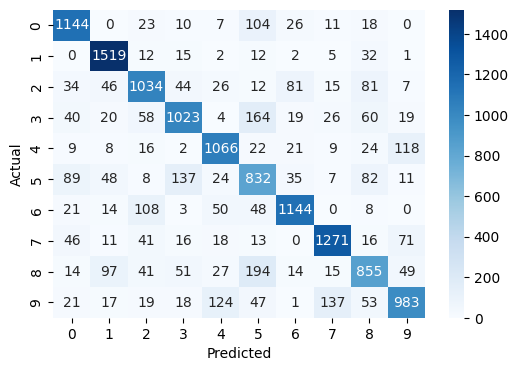

In [ ]:
svcClassifier(X, Y, 0.2, 'sigmoid')

In [ ]:
# For the 80:20 distribution of the dataset using the SVC model with sigmoid kernel, the accuracy obtained is 77%

Part 2 - 70:30 Raio

In [ ]:
svcClassifier(X, Y, 0.3, 'linear')

[LibLinear]

In [ ]:
# for the 70:30 ratio of the dataset with the SVC classifier with linear kernel gives about 91% accuracy.

In [ ]:
# polynomial

In [ ]:
svcClassifier(X, Y, 0.3, 'poly')

In [ ]:
# For the 70:30 ratio distribution of the dataset with SVC Classifier with polynomial kernel, the accuracy is 97.3 %

In [ ]:
# gaussian
svcClassifier(X, Y, 0.3, 'rbf')

In [ ]:
# For the 70:30 ratio distribution of the dataset with SVC Classifier with gaussian kernel, the accuracy is 97.6 %

In [ ]:
# sigmoid
svcClassifier(X, Y, 0.3, 'sigmoid')

Part 3 - 60:40 Ratio

In [ ]:
# linear
svcClassifier(X, Y, 0.4, 'linear')

In [ ]:
# For the 60:40 ratio distribution of the dataset with SVC Classifier with model linear, the accuracy is 90.8 %

In [ ]:
# polunomial
svcClassifier(X, Y, 0.4, 'poly')

In [ ]:
# For the 60:40 ratio distribution of the dataset with SVC Classifier with model polynomial , the accuracy is 97.2 %

In [ ]:
# gaussian

In [ ]:
svcClassifier(X, Y, 0.4, 'rbf')

In [ ]:
# For the 60:40 ratio distribution of the dataset with SVC Classifier with model gaussian, the accuracy is 97.5 %

In [ ]:
# sigmoid

In [ ]:
svcClassifier(X, Y, 0.4, 'sigmoid')

In [ ]:
# For the 60:40 ratio distribution of the dataset with SVC Classifier with model sigmoid, the accuracy is 78.3 %

Part 4 - 50:50 Ratio

In [ ]:
# linear
svcClassifier(X, Y, 0.5, 'linear')

In [ ]:
# For the 50:50 Ratio distribution of the dataset, using the SVC model with the kernel as linear, the accuracy comes out to be 90.7%

In [ ]:
# polynomial

In [ ]:
svcClassifier(X, Y, 0.5, 'poly')

In [ ]:
# For the 50:50 Ratio distribution of the dataset, using the SVC model with the kernel as polynomial, the accuracy comes out to be 97.1%

In [ ]:
# gaussian
svcClassifier(X, Y, 0.5, 'rbf')

In [ ]:
# For the 50:50 Ratio distribution of the dataset, using the SVC model with the kernel as gaussian, the accuracy comes out to be 97.4%

In [ ]:
# sigmoid
svcClassifier(X, Y, 0.5, 'sigmoid')

In [ ]:
# For the 50:50 Ratio distribution of the dataset, using the SVC model with the kernel as sigmoid, the accuracy comes out to be 78.7%

<h1>MLP Classifier</h1>

In [ ]:
from sklearn.neural_network import MLPClassifier

def mlpClassifier(X, Y, test_size, momentum, epochs, learning_rate):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    mlpModel = MLPClassifier(hidden_layer_sizes=(100,), momentum=momentum, max_iter=epochs, learning_rate_init=learning_rate, solver='adam', verbose=True, random_state=42)
    mlpModel.fit(X_train, Y_train)
    y_pred = mlpModel.predict(X_test)

    print("Accuracy score: ", accuracy_score(Y_test, y_pred))
    print("Precision score: ", precision_score(Y_test, y_pred, average='macro'))
    print("Recall score: ", recall_score(Y_test, y_pred, average='macro'))
    print("F1 score: ", f1_score(Y_test, y_pred, average='macro'))

    cm = confusion_matrix(Y_test, y_pred)
    print("Confusion matrix:\n", cm)

    print("The heatmap is:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # print("Validated accuracy score is ", cross_val_score(RandomForestClassifier(), X, Y, scoring = 'accuracy', cv=10).mean())


Part 1 - 80:20 Ratio

In [ ]:
mlpClassifier(X, Y, 0.2, 0.9, 1000, 0.001)

In [ ]:
# For the 80:20 ratio distribution of the dataset, with the MLP classification model, the accuracy score is about 96%

Part 2 - 70:30 Ratio

In [ ]:
mlpClassifier(X, Y, 0.3, 0.9, 100, 0.001)

In [ ]:
# For the 70:30 ratio distribution of the dataset, with the MLP classification model, the accuracy score is about 95.8%

Part 3 - 60:40 Ratio

In [ ]:
mlpClassifier(X, Y, 0.4, 0.9, 60, 0.001)